#Лабораторная работа №3
## Обработка бинарных изображений. Морфология.

1. Открыть изображение, преобразовать в бинарное. Или создать бинарное изображение средствами OpenCV.
2. Зашумить изображение импульсным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 1.
  *   Вывод: зашумленное изображение.
3. Написать функции реализации эрозии и дилатации.

> Функции вида fun(Image, struct)  
Где struct  - структурный элемент в виде матрицы

4. Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.
  *   Вход: изображение из пункта 2.
  *   Вывод: Исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после эрозии и дилатации.
5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).  
Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2.
  *   Вывод:  исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после вскрытия и закрытия. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

6. На исходном изображении  с помощью морфологических операций выделить контур объекта. Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.
  *   Вход: изображение из пункта 1.
  *   Вывод: исходное изображение, изображение с выделенными контурами.

7. На исходном изображении  с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта.
  *   Вход: изображение из пункта 1.
  *   Вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.

  
    
    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного.*
  
  
  

---



> По всем вопросам писать в ЛС в tg ***volfgunus***




Ссылки на полезные ресурсы:

1.    [Документация OpenCV](https://docs.opencv.org/4.x/index.html)
1.    [Связанность пикселей](https://en.wikipedia.org/wiki/Pixel_connectivity)
1.    [Математическая морфология](https://en.wikipedia.org/wiki/Mathematical_morphology)



# Варианты задания


№ варианта | Вероятность p | Вид структурного элемента
--- | :---: | :---:
1 | 0,1 | крест 5×5
2 | 0,15 | квадрат 3×3
3 | 0,2 | крест 3×3
4 | 0,25 | квадрат 5×5
5 | 0,3 | квадрат 3×3
6 | 0,35 | крест 5×5
7 | 0,1 | крест 3×3
8 | 0,2 | квадрат 5×5
9 | 0,3 | крест 3×3
10 | 0,25 | крест 5×5
11 | 0,12 | квадрат 5×5



# Контрольные темы

1. Бинарные изображения.
2. Основные операции математической морфологии.
3. Эрозия и дилатация.
4. Вскрытие изображения.
5. Закрытие изображения.
6. Выделение контуров на бинарном изображении.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma.core import zeros_like

1. Открыть изображение, преобразовать в бинарное. Или создать бинарное изображение средствами OpenCV.

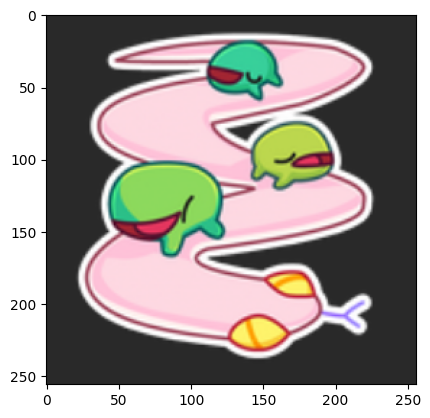

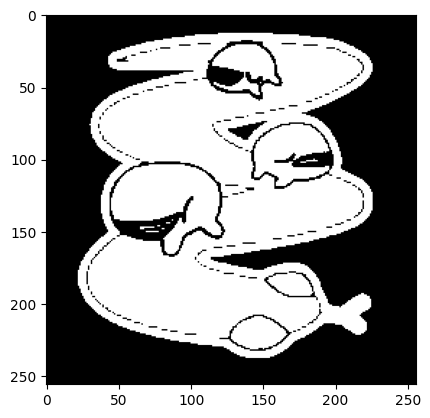

In [2]:
def show_image(image):
    # image = normalize(image).astype('uint8')
    
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.show()
    
def to_grayscale(image):
    image_gray = np.zeros([image.shape[0],image.shape[1]], dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_gray[i][j] = 0.2989*image[i,j,0]+0.5870*image[i,j,1]+0.1140*image[i,j,2]
    return image_gray    

image_orig = cv2.resize(cv2.imread('img1.png',1).astype('uint8')[:,:,::-1], (256,256))
# image_orig = cv2.resize(cv2.imread('img1.png',1).astype('uint8')[:,:,::-1], (1024,1024))

def to_bin(image, thresh):
    image_gray = to_grayscale(image)
    image_bin = np.zeros_like(image_gray, dtype=bool)
    image_bin[image_gray > thresh] = True
    return image_bin

show_image(image_orig) # Менять тут
image_bin = to_bin(image_orig, thresh=111)
show_image(image_bin)
    

2. Зашумить изображение импульсным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 1.
  *   Вывод: зашумленное изображение. <br>
p = 0.3

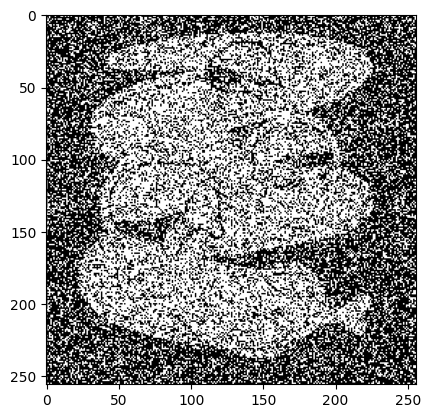

In [3]:
def impulse_noise(image):
    p = 0.3
    mask = np.random.rand(image.shape[0],image.shape[1]) < p
    image_noised = image ^ mask
    return image_noised
    
image_noise = impulse_noise(image_bin)
show_image(image_noise)

3. Написать функции реализации эрозии и дилатации.

> Функции вида fun(Image, struct)  
Где struct  - структурный элемент в виде матрицы

In [4]:
def dilation(image, struct):
    image_h, image_w = image.shape
    struct_h, struct_w = struct.shape
    height, width = image_h + struct_h - 1, image_w + struct_w - 1
    
    image_dil = np.zeros((height,width), dtype=bool)
    for i in range(image_h):
        for j in range(image_w):
            if image[i,j | struct[struct_h//2,struct_w//2]].all(): 
                image_dil[i:struct_h+i,j:struct_w+j] = struct
    return image_dil[struct.shape[0]//2:-struct.shape[0]//2+1,
           struct.shape[1]//2:-struct.shape[1]//2+1]

In [5]:
def erosion(image, struct):
    image_h, image_w = image.shape
    struct_h, struct_w = struct.shape
    height, width = image_h - struct_h - 1, image_w - struct_w - 1
    
    image_dil = np.zeros_like(image, dtype=bool)
    for i in range(height):
        for j in range(width):
            if (image[i:i+struct_h,j:j+struct_w] & struct).all(): 
                image_dil[i + struct_h//2,j + struct_w//2] = struct[struct_h//2, struct_w//2]
    return image_dil

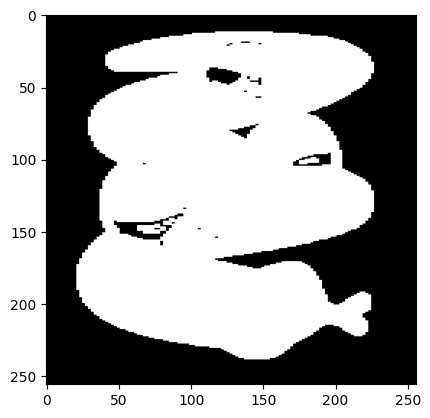

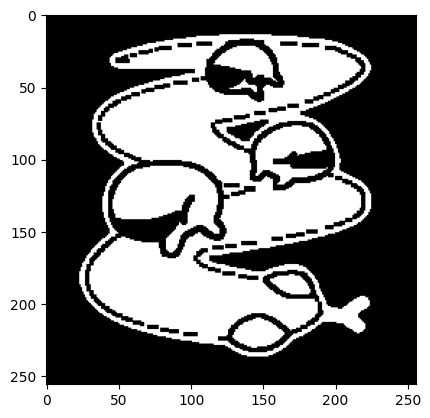

In [6]:
struct = np.array([[1,1,1],[1,1,1],[1,1,1]], dtype=bool)


show_image(dilation(image_bin, struct))
show_image(erosion(image_bin, struct))

4. Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.
  *   Вход: изображение из пункта 2.
  *   Вывод: Исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после эрозии и дилатации.

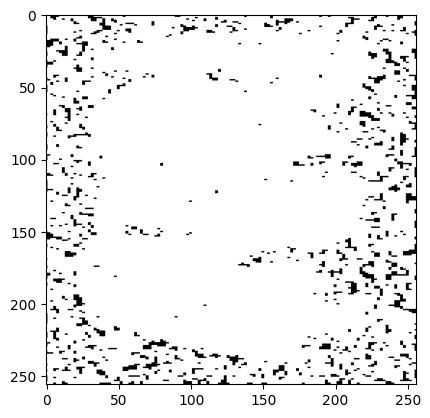

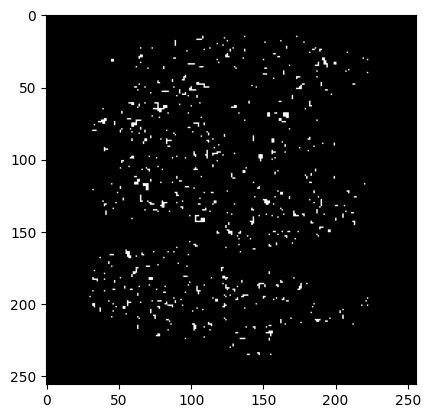

In [7]:
struct = np.array([[1,1,1],[1,1,1],[1,1,1]], dtype=bool)

show_image(dilation(image_noise, struct))
show_image(erosion(image_noise, struct))

5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).  
Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2.
  *   Вывод:  исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после вскрытия и закрытия. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

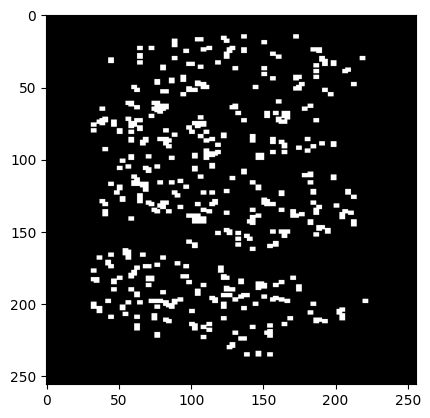

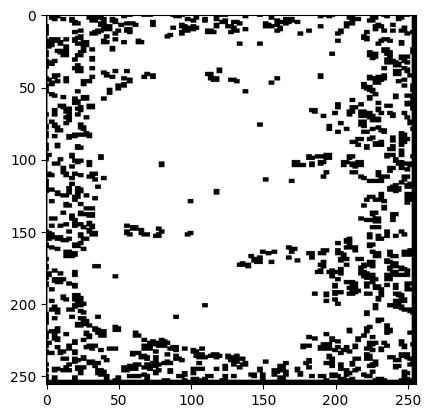

In [8]:
show_image(dilation(erosion(image_noise, struct),struct))
show_image(erosion(dilation(image_noise, struct),struct))

6. На исходном изображении  с помощью морфологических операций выделить контур объекта. Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.
  *   Вход: изображение из пункта 1.
  *   Вывод: исходное изображение, изображение с выделенными контурами.

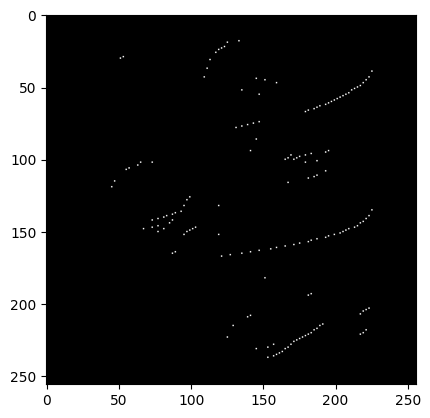

In [18]:
struct_out = np.array([[0,0,1,0,0],[0,0,0,0,0],[1,0,0,0,1],[0,0,0,0,0],[0,0,1,0,0]], dtype=bool)
struct_in = np.array([[0,0,0],[0,1,0],[0,0,0]], dtype=bool)
struct_4x = np.array([[0,1,0],[1,1,1],[0,1,0]], dtype=bool)
struct_8x = np.array([[1,1,1],[1,1,1],[1,1,1]], dtype=bool)

struct_mod = struct_in
show_image(dilation(image_bin, struct_mod) ^ erosion(image_bin, struct_mod))

7. На исходном изображении  с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта.
  *   Вход: изображение из пункта 1.
  *   Вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.

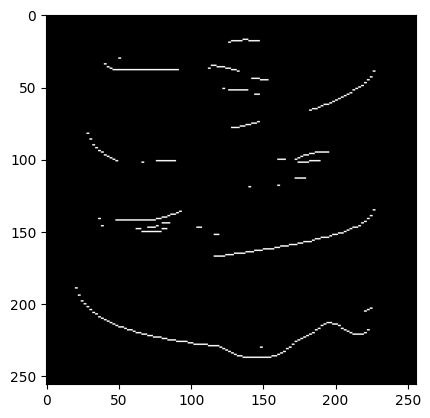

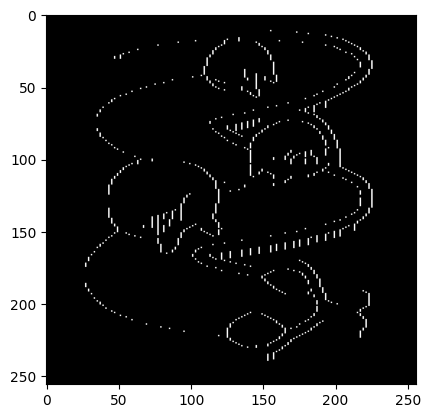

In [10]:
struct_w = np.array([[0,0,0,0,0],[0,0,0,0,0],[1,1,1,1,1],[0,0,0,0,0],[0,0,0,0,0]], dtype=bool)
show_image(dilation(image_bin, struct_w) ^ erosion(image_bin, struct_w))


struct_h = np.array([[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0]], dtype=bool)
show_image(dilation(image_bin, struct_h) ^ erosion(image_bin, struct_h))